In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Z = np.array([
    30, 27, 35, 
    13, 20, 10, 
    25, 47, 26, 
    38, 38, 23, 
    40, 39, 23, 
    33, 31, 20, 
    37, 44]
)
R = np.array([
    2.7, 1.9, 5.5, 
    0.6, 0.7, 0.3, 
    1.4, 38.9, 1.7, 
    9, 8.9, 1, 12.5, 
    10.4, 1.1, 4.1, 
    3.2, 0.8, 7.8, 
    23.8]
)

Z.sort()
R.sort()
print(Z)
print(R)

[10 13 20 20 23 23 25 26 27 30 31 33 35 37 38 38 39 40 44 47]
[ 0.3  0.6  0.7  0.8  1.   1.1  1.4  1.7  1.9  2.7  3.2  4.1  5.5  7.8
  8.9  9.  10.4 12.5 23.8 38.9]
condition number:  10311.993088226101
Standard Deviation: 6.219945198730356
Coefficient of determination: 0.5934896074004419
Correlation Coefficient: 0.7703827668116946


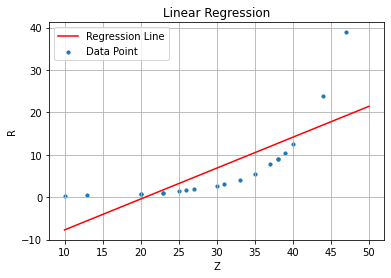

In [6]:
space=np.linspace(10, 50)    # line space
A = np.zeros((2, 2))
B = np.zeros(2)

#Construct Matrix for solution
n=np.size(Z)
m=1
A[0,0]=np.size(Z)
A[0,1]=np.sum(Z)
A[1,0]=np.sum(Z)
A[1,1]=np.sum(Z**2)
B[0]=np.sum(R)
B[1]=np.sum(Z*R)

#Solve AX=B to know a0(X[0]), a1(X[1])
X = np.inner(np.linalg.inv(A),B)
print("condition number: ",np.linalg.cond(A)) 

#construct regression line
regress = X[1] * space + X[0] 

St=np.sum((R-np.mean(R))**2)
Sr=np.sum((R-X[0]-X[1]*Z)**2)
Syx=np.sqrt(Sr/(n-(m+1)))
r2=(St-Sr)/St
r=np.sqrt(r2)

print('Standard Deviation:',Syx)
print('Coefficient of determination:',r2)
print('Correlation Coefficient:',r)

plt.scatter(Z, R,s=10)
plt.plot(space, regress,'r')
plt.title("Linear Regression")
plt.legend(['Regression Line','Data Point'])
plt.xlabel('Z')
plt.ylabel('R')
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
lon=open('buoy.txt').readline().split(',')[1:-1]
print('原始資料')
print(lon)
print('----------------------------------------')
print()

In [ ]:
for i in range(len(lon)):
    lon[i]=lon[i][:-1]
print('去除東西向註解')
print(lon)
print('----------------------------------------')
print()

In [ ]:
lon=np.array(lon).astype('float32')
print('轉為浮點數矩陣')
print(lon)
print('----------------------------------------')
print()

In [ ]:
lon[4:]=lon[4:]+(180-lon[4:])*2
print('過國際換日線的部分要換成銳角')
print(lon)
print('----------------------------------------')
print()

In [ ]:
lon=lon/180*np.pi
print('角度轉弧度')
print(lon)
print('----------------------------------------')
print()

原始資料
['147E', '156E', '165E', '180E', '170W', '155W', '140W', '125W', '110W', '95W']
----------------------------------------

去除東西向註解
['147', '156', '165', '180', '170', '155', '140', '125', '110', '95']
----------------------------------------

轉為浮點數矩陣
[147. 156. 165. 180. 170. 155. 140. 125. 110.  95.]
----------------------------------------

過國際換日線的部分要換成銳角
[147. 156. 165. 180. 190. 205. 220. 235. 250. 265.]
----------------------------------------

角度轉弧度
[2.565634  2.7227137 2.8797934 3.1415927 3.3161259 3.577925  3.8397243
 4.101524  4.363323  4.6251225]
----------------------------------------

       0          1          2          3          4          5          6   \
0     1.0  29.780001  30.139999  29.629999  29.059999  28.910000  29.280001   
1     5.0  29.620001  30.219999  29.590000  29.059999  28.870001  29.219999   
2    10.0  29.379999  30.180000  29.570000  29.059999  28.850000  29.170000   
3    20.0  28.860001  29.750000  29.719999  29.040001  28.870001  29.150000

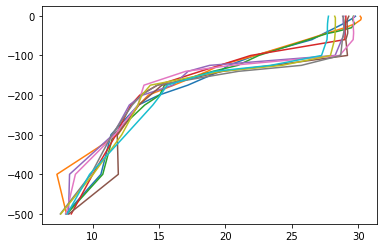

NameError: name 'x' is not defined

In [9]:
data=pd.DataFrame(np.array(pd.read_csv('buoy.txt',',',header=None)[1:])[:,:-1].astype('float32'))
depth=data[0]
print(data)

for i in range(1,data.shape[1]):
    #print(data[i])
    plt.plot(data[i],-1*depth)
plt.show()

n = 4
x_miss = 20
def NewtInt(x,y,n,x_miss):
    fdd = np.zeros((n,n))
    fdd[0:n,0] = y[0:n]
    for j in range(1,n,1):
        for i in range(0,n-j,1):
            fdd[i,j] = (fdd[i+1,j-1]-fdd[i,j-1])/(x[i+j]-x[i])
    y_interp = y[0]
    xterm = 1.0
    for order in range(1,n):
        xterm = xterm*(x_miss-x[order-1])
        y_interp = y_interp + fdd[0,order]*xterm
    return y_interp
ans_New = NewtInt(x,y,n,x_miss)
print("Newton's interpolating polynomials f(4)=",ans_New)

def Lagrange(x,y,n,x_miss):
    sum=0
    for i in range(n):
        product = 1
        for j in range(n):
            if i != j:
                product = product*(x_miss - x[j])/(x[i] - x[j])
        sum = sum + product*y[i]
    return sum
ans1 = Lagrange(x,y,n,x_miss)
print('Lagrange polynomials f(4)=',ans1)